In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
files={}
files['array']=R.TFile("MS3/prodAnalysis.root")
files['pmt']=R.TFile("MS3/prodAnalysis_PMT.root")
files['tofpet']=R.TFile("MS3/prodAnalysis_TOFPET.root")

In [3]:
#files['tofpet'].ls()

In [4]:
g={}
g['ly_array']=files['array'].Get("lyNorm_byProd_geo2_PREIRR")
#g['ly_array'].Print()
g['sigmaT_array']=files['array'].Get("sigmaT_byProd_geo2_PREIRR")
g['ly_pmt']=files['pmt'].Get("lyAbs_byProd_geo2_PREIRR")
g['ly_esr_pmt']=files['pmt'].Get("lyAbs_byProd_geo2_esr_PREIRR")
g['tau_pmt']=files['pmt'].Get("dt_byProd_geo2_PREIRR")
g['ly_tofpet']=files['tofpet'].Get("ly_byProd_geo2")
g['ly_esr_tofpet']=files['tofpet'].Get("ly_byProd_geo2_esr")
g['sigmaT_esr_tofpet']=files['tofpet'].Get("sigmaT_byProd_geo2_esr")

In [5]:
c1=R.TCanvas("c1","c1",800,600)
#g['array'].Draw("AP")
#g['pmt'].Draw("PSAME")
g['relLossArray']=R.TGraphErrors()
g['relLossArrayESR']=R.TGraphErrors()
g['maxlyDTArray']=R.TGraphErrors()
g['lyArrayVsPMT']=R.TGraphErrors()
g['lyArrayVsPMTESR']=R.TGraphErrors()
g['lyArrayVsTOFPETESR']=R.TGraphErrors()
g['sigmaTArrayVsTOFPETESR']=R.TGraphErrors()

g['relLossESRTOFPETVsPMT']=R.TGraphErrors()
g['relLossArrayVsTOFPETESR']=R.TGraphErrors()

g['lyDTArray']=R.TGraphErrors()
g['sigmaTVsLYDT']=R.TGraphErrors()

g['lyTOFPETVsPMT']=R.TGraphErrors()
g['lyTOFPETVsPMTESR']=R.TGraphErrors()
g['lyLossTOFPETVsPMTESR']=R.TGraphErrors()

data={}
data['ly_array']=[]
data['sigmaT_array']=[]
data['ly_pmt']=[]
data['ly_esr_pmt']=[]
data['tau_pmt']=[]
data['ly_tofpet']=[]
data['ly_esr_tofpet']=[]
data['sigmaT_esr_tofpet']=[]

producers=['prod1','prod2','prod3','prod4','prod5','prod6','prod8','prod9','prod10']

import ctypes
for i in range(9):
    x,y,x1,y1,x2,y2,x3,y3,x4,y4=ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0)
    x5,y5,x6,y6,x7,y7=ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0),ctypes.c_double(0)
    g['ly_array'].GetPoint(i,x,y)
    g['ly_pmt'].GetPoint(i,x1,y1)
    g['tau_pmt'].GetPoint(i,x2,y2)
    g['sigmaT_array'].GetPoint(i,x3,y3)
    g['ly_esr_pmt'].GetPoint(i,x4,y4)
    g['ly_tofpet'].GetPoint(i,x5,y5)
    g['ly_esr_tofpet'].GetPoint(i,x6,y6)
    g['sigmaT_esr_tofpet'].GetPoint(i,x7,y7)
    
    data['ly_array'].append(y.value)
    data['sigmaT_array'].append(y3.value)
    data['ly_pmt'].append(y1.value)
    data['ly_esr_pmt'].append(y4.value)
    data['tau_pmt'].append(y2.value)
    data['ly_tofpet'].append(y5.value)
    data['ly_esr_tofpet'].append(y6.value)
    data['sigmaT_esr_tofpet'].append(y7.value)
    
    g['lyArrayVsPMT'].SetPoint(i,(data['ly_array'][i]/data['ly_array'][0]),(data['ly_pmt'][i]/data['ly_pmt'][0]))
    g['lyArrayVsPMT'].SetPointError(i,0.03,0.04)
    g['lyArrayVsPMTESR'].SetPoint(i,(data['ly_array'][i]/data['ly_array'][0]),(data['ly_esr_pmt'][i]/data['ly_esr_pmt'][0]))
    g['lyArrayVsPMTESR'].SetPointError(i,0.03,0.04)

    g['lyArrayVsTOFPETESR'].SetPoint(i,(data['ly_array'][i]/data['ly_array'][0]),(data['ly_esr_tofpet'][i]/data['ly_esr_tofpet'][0]))
    g['lyArrayVsTOFPETESR'].SetPointError(i,0.03,0.04)

    g['sigmaTArrayVsTOFPETESR'].SetPoint(i,(data['sigmaT_array'][i]/data['sigmaT_array'][0]),(data['sigmaT_esr_tofpet'][i]/data['sigmaT_esr_tofpet'][0]))
    g['sigmaTArrayVsTOFPETESR'].SetPointError(i,0.03,0.04)
    
    g['lyTOFPETVsPMT'].SetPoint(i,(data['ly_tofpet'][i]/data['ly_tofpet'][0]),(data['ly_pmt'][i]/data['ly_pmt'][0]))
    g['lyTOFPETVsPMT'].SetPointError(i,0.03,0.04)
    g['lyTOFPETVsPMTESR'].SetPoint(i,(data['ly_esr_tofpet'][i]/data['ly_esr_tofpet'][0]),(data['ly_esr_pmt'][i]/data['ly_esr_pmt'][0]))
    g['lyTOFPETVsPMTESR'].SetPointError(i,0.03,0.04)

    g['lyLossTOFPETVsPMTESR'].SetPoint(i,(data['ly_esr_tofpet'][i]/data['ly_tofpet'][i]),(data['ly_esr_pmt'][i]/data['ly_pmt'][i]))
    g['lyLossTOFPETVsPMTESR'].SetPointError(i,0.03,0.04)
    
    g['relLossArray'].SetPoint(i,i,(data['ly_array'][i]/data['ly_array'][0])/(data['ly_pmt'][i]/data['ly_pmt'][0]))
    g['relLossArray'].SetPointError(i,0,0.03)
    g['relLossArrayESR'].SetPoint(i,i,(data['ly_array'][i]/data['ly_array'][0])/(data['ly_esr_pmt'][i]/data['ly_esr_pmt'][0]))
    g['relLossArrayESR'].SetPointError(i,0,0.03)
    g['lyDTArray'].SetPoint(i,i,(data['ly_array'][i]/data['tau_pmt'][i])*4700)
    g['lyDTArray'].SetPointError(i,0,(data['ly_array'][i]/data['tau_pmt'][i])*4700*0.03)
    g['sigmaTVsLYDT'].SetPoint(i,(data['ly_array'][0]/data['tau_pmt'][0])/(data['ly_array'][i]/data['tau_pmt'][i]),data['sigmaT_array'][i]/data['sigmaT_array'][0])
    g['sigmaTVsLYDT'].SetPointError(i,0.01,0.02)
    
    g['relLossESRTOFPETVsPMT'].SetPoint(i,i,(data['ly_esr_tofpet'][i]/data['ly_tofpet'][i])/(data['ly_esr_pmt'][i]/data['ly_pmt'][i]))
    g['relLossESRTOFPETVsPMT'].SetPointError(i,0,0.04)
    
    g['relLossArrayVsTOFPETESR'].SetPoint(i,i,(data['ly_array'][i]/data['ly_array'][0])/(data['ly_esr_tofpet'][i]/data['ly_esr_tofpet'][0]))
    g['relLossArrayVsTOFPETESR'].SetPointError(i,0,0.03)
    
for k in ['ly_array','ly_pmt','tau_pmt','relLossArray','lyDTArray','relLossArrayVsTOFPETESR','relLossESRTOFPETVsPMT']:
    g[k].GetHistogram().SetBins(len(data['ly_array']),-0.5,len(data['ly_array'])-0.5)
    for i in range(len(producers)):
        g[k].GetHistogram().GetXaxis().SetBinLabel(i+1,producers[i])
    g[k].SetMarkerStyle(24)
    g[k].SetMarkerColor(1)
    g[k].SetLineColor(1)
    g[k].SetMarkerSize(0.8)

In [6]:
t=R.TLatex()
t.SetTextSize(0.04)

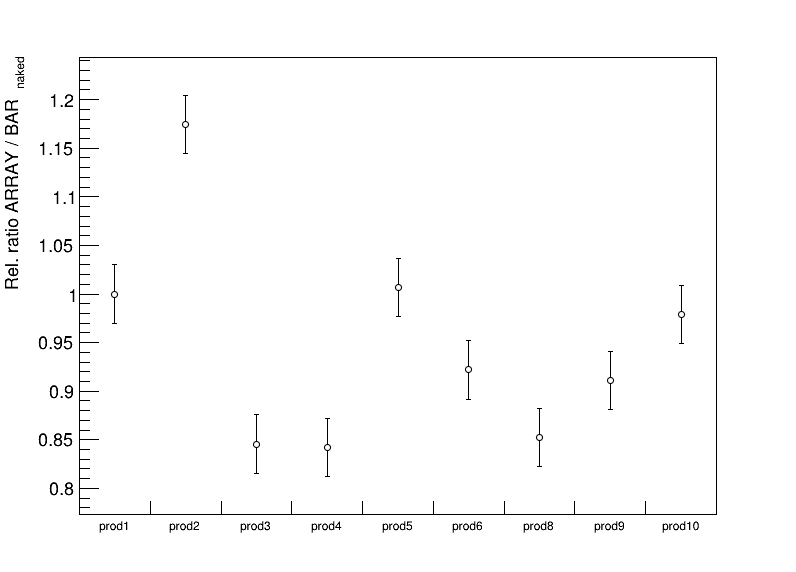

In [7]:
g['relLossArray'].GetHistogram().GetYaxis().SetTitle('Rel. ratio ARRAY / BAR_{naked}')
g['relLossArray'].Draw("AP")
c1.Draw()

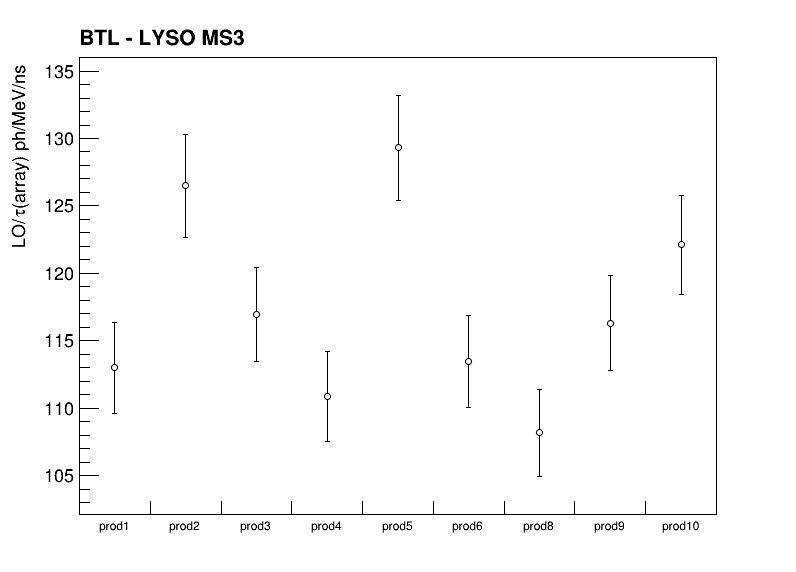

In [8]:
g['lyDTArray'].Draw("AP")
g['lyDTArray'].GetHistogram().GetYaxis().SetTitle("LO/#tau(array) ph/MeV/ns")
t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

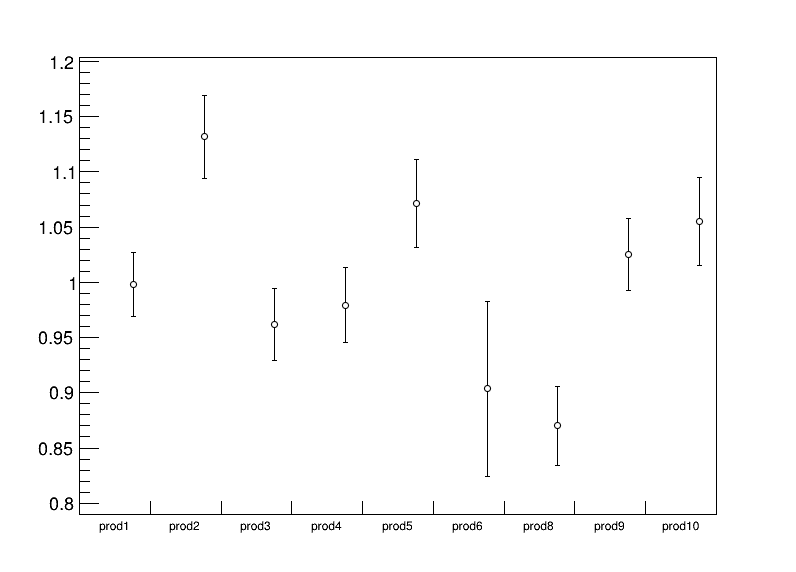

In [9]:
g['ly_array'].Draw("AP")
c1.Draw()

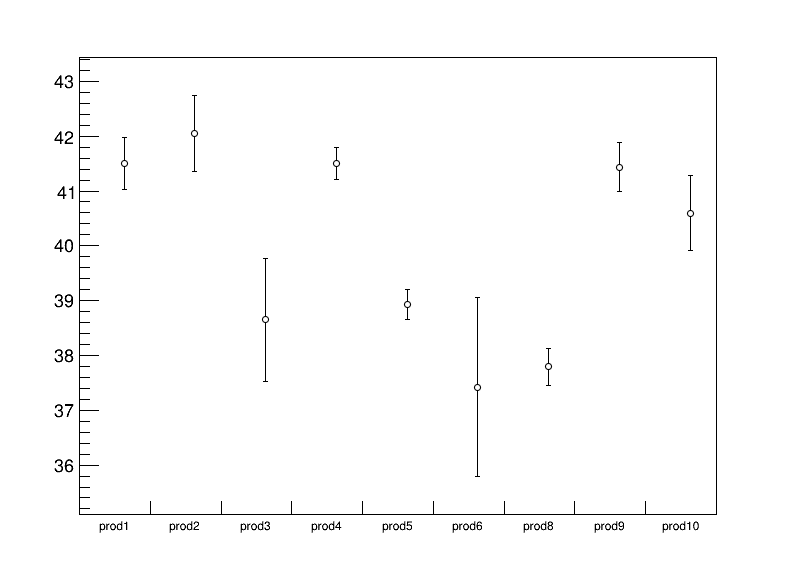

In [10]:
g['tau_pmt'].Draw("AP")
c1.Draw()

 FCN=12.9302 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=2.5344e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.40677e-01   1.25191e-01   1.24973e-05  -2.25878e-03
   2  p1           4.82331e-01   1.29465e-01   1.29239e-05  -3.91583e-03


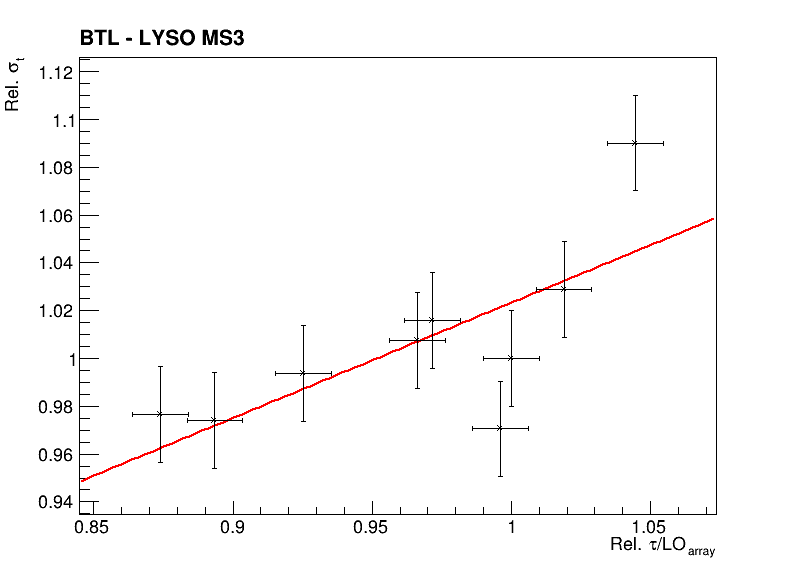

In [11]:
g['sigmaTVsLYDT'].Draw("AP*")
g['sigmaTVsLYDT'].Fit("pol1")
g['sigmaTVsLYDT'].GetHistogram().GetXaxis().SetTitle("Rel. #tau/LO_{array}")
g['sigmaTVsLYDT'].GetHistogram().GetYaxis().SetTitle("Rel. #sigma_{t}")
t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

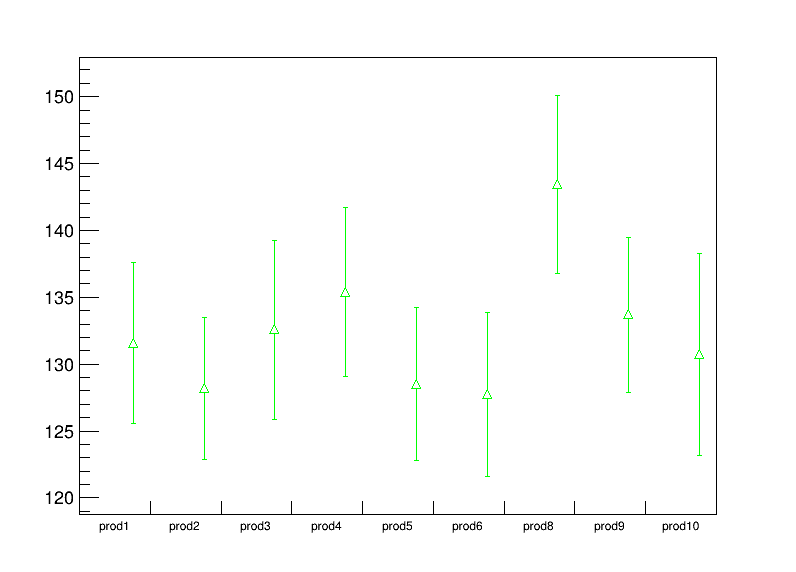

In [12]:
g['sigmaT_array'].Draw("AP")
c1.Draw()

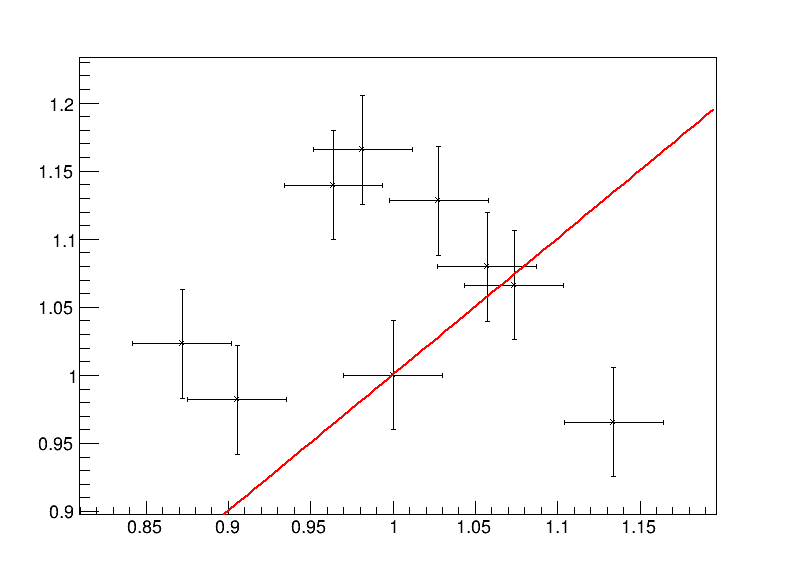

In [13]:
g['lyArrayVsPMT'].Draw("AP*")
f=R.TF1('f','x',0,2)
f.Draw('SAME')
c1.Draw()

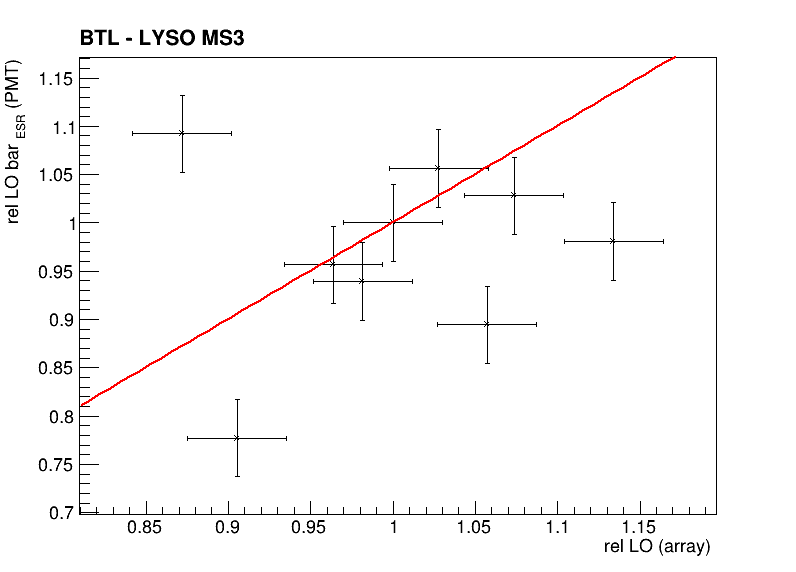

In [14]:
g['lyArrayVsPMTESR'].Draw("AP*")
g['lyArrayVsPMTESR'].GetHistogram().GetXaxis().SetTitle("rel LO (array)")
g['lyArrayVsPMTESR'].GetHistogram().GetYaxis().SetTitle("rel LO bar_{ESR} (PMT)")
f.Draw("SAME")
t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

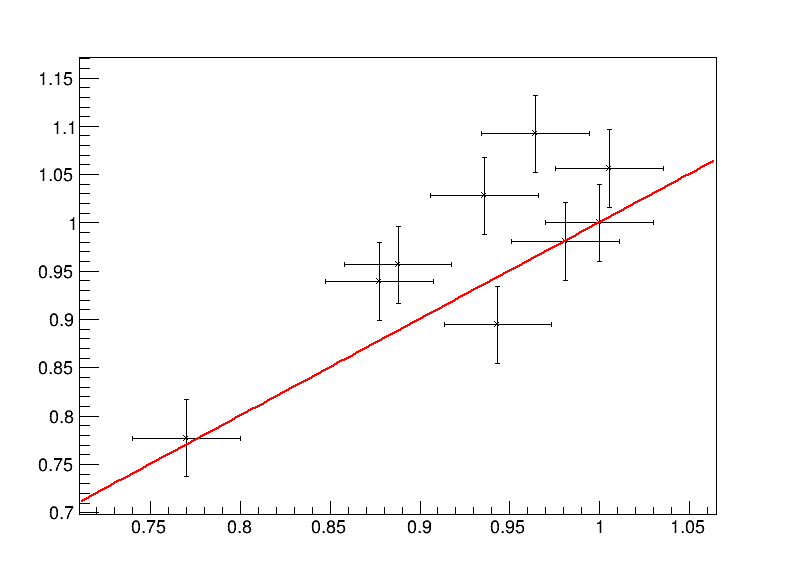

In [15]:
g['lyTOFPETVsPMTESR'].Draw("AP*")
f.Draw('SAME')
#g['lyTOFPETVsPMT'].Fit('pol1')
c1.Draw()

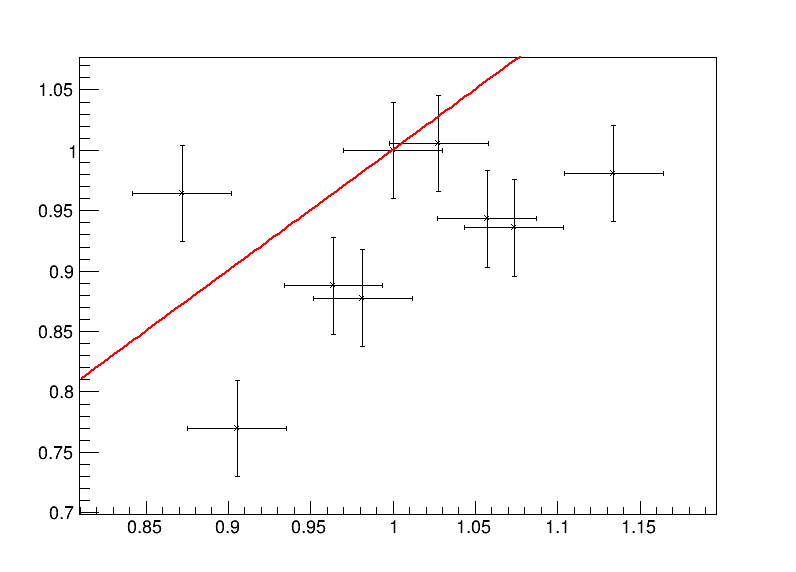

In [16]:
g['lyArrayVsTOFPETESR'].Draw("AP*")
f.Draw('SAME')
#g['lyTOFPETVsPMT'].Fit('pol1')
c1.Draw()

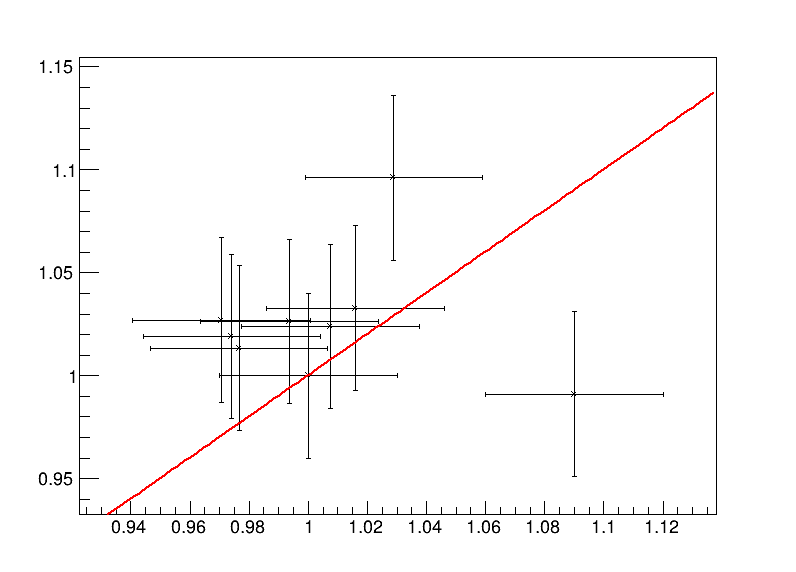

In [17]:
g['sigmaTArrayVsTOFPETESR'].Draw("AP*")
f.Draw('SAME')
#g['lyTOFPETVsPMT'].Fit('pol1')
c1.Draw()

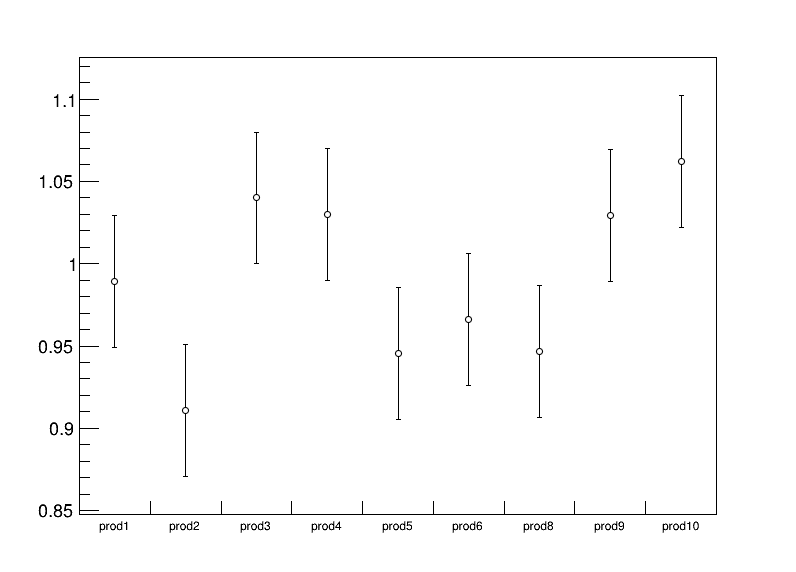

In [18]:
g['relLossESRTOFPETVsPMT'].Draw("AP")
#f.Draw('SAME')
#g['lyTOFPETVsPMT'].Fit('pol1')
c1.Draw()

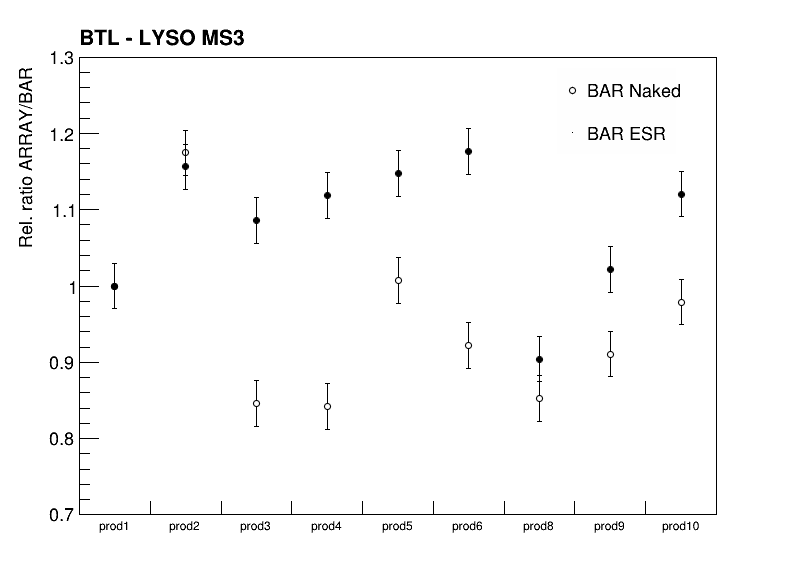

In [19]:
l=R.TLegend(0.7,0.73,0.85,0.88)
l.SetBorderSize(0)
l.SetTextSize(0.035)
l.SetFillColorAlpha(0,0)
g['relLossArrayVsTOFPETESR'].Draw("AP")
g['relLossArray'].Draw("PSAME")
g['relLossArrayVsTOFPETESR'].GetHistogram().GetYaxis().SetTitle("Rel. ratio ARRAY/BAR")
g['relLossArrayVsTOFPETESR'].SetMarkerStyle(20)
g['relLossArrayVsTOFPETESR'].GetHistogram().GetYaxis().SetRangeUser(0.7,1.3)
l.AddEntry(g['relLossArray'],"BAR Naked","P")
l.AddEntry(g['relLossArrayESR'],"BAR ESR","P")
l.Draw("SAME")
t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

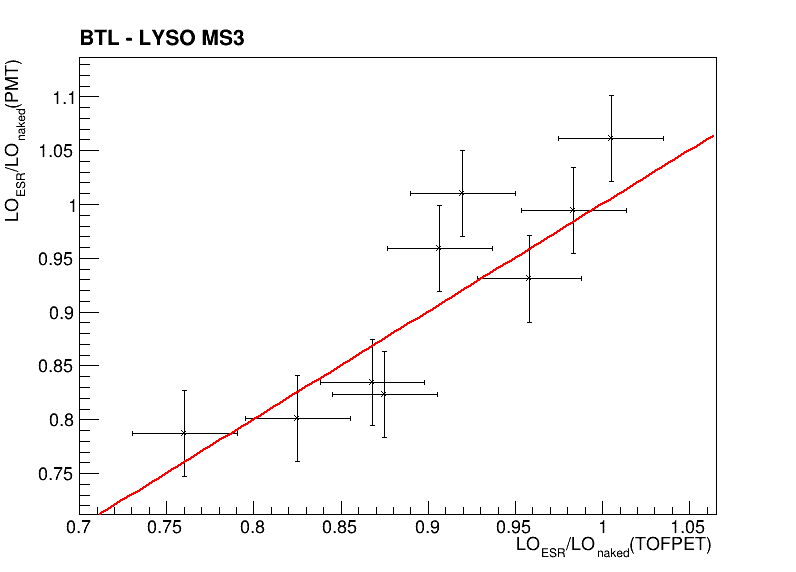

In [20]:
g['lyLossTOFPETVsPMTESR'].Draw("AP*")
g['lyLossTOFPETVsPMTESR'].GetHistogram().GetXaxis().SetTitle("LO_{ESR}/LO_{naked}(TOFPET)")
g['lyLossTOFPETVsPMTESR'].GetHistogram().GetYaxis().SetTitle("LO_{ESR}/LO_{naked}(PMT)")
f.Draw("SAME")
t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

In [53]:
import numpy as np
g['ly_rms']=R.TGraphErrors()
g['ly_q5']=R.TGraphErrors()
g['ly_q5overRMS']=R.TGraphErrors()
prob=np.array([0.05,0.5-0.683/2,0.5,0.5+0.683/2.,0.95])
q=np.array([0.,0.,0.,0.,0.])
for ip,p in enumerate(producers):
    g['ly_array_allxtals_%s'%p]=files['array'].Get("h1_ly_byProd_%s_geo2_PREIRR"%p)
    g['ly_array_allxtals_%s'%p].GetQuantiles(5,q,prob)
    g['ly_rms'].SetPoint(ip,ip,g['ly_array_allxtals_%s'%p].GetRMS()/g['ly_array_allxtals_%s'%p].GetMean())
    g['ly_rms'].SetPointError(ip,0.,0.005)
    g['ly_q5'].SetPoint(ip,ip,(g['ly_array_allxtals_%s'%p].GetMean()-q[0])/g['ly_array_allxtals_%s'%p].GetMean())
    g['ly_q5'].SetPointError(ip,0.,0.005)
    g['ly_q5overRMS'].SetPoint(ip,ip,(g['ly_array_allxtals_%s'%p].GetMean()-q[0])/g['ly_array_allxtals_%s'%p].GetMean())
    g['ly_q5overRMS'].SetPointError(ip,0.,0.01)

for k in ['ly_rms','ly_q5','ly_q5overRMS']:
    g[k].GetHistogram().SetBins(len(data['ly_array']),-0.5,len(data['ly_array'])-0.5)
    for i in range(len(producers)):
        g[k].GetHistogram().GetXaxis().SetBinLabel(i+1,producers[i])
    g[k].SetMarkerStyle(24)
    g[k].SetMarkerColor(1)
    g[k].SetLineColor(1)
    g[k].SetMarkerSize(0.8)

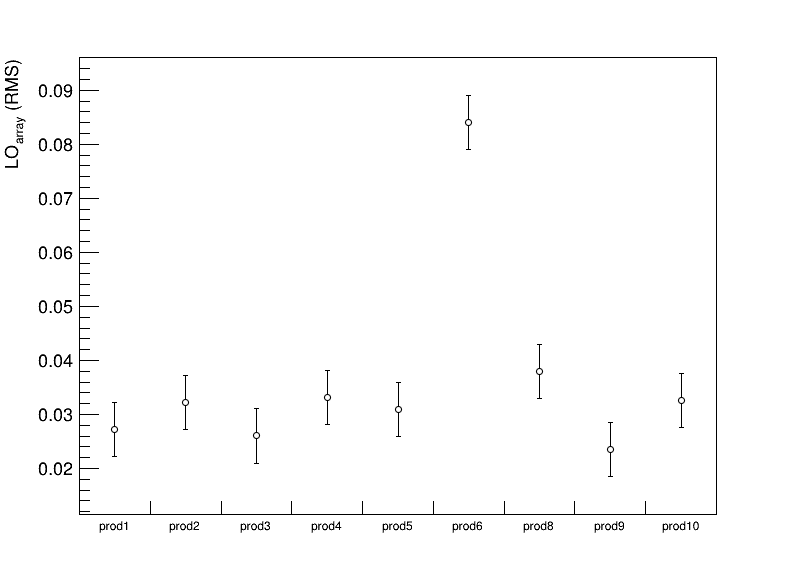

In [40]:
g['ly_rms'].Draw("AP")
g['ly_rms'].GetHistogram().GetYaxis().SetTitle("LO_{array} (RMS)")
#f.Draw("SAME")
#t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

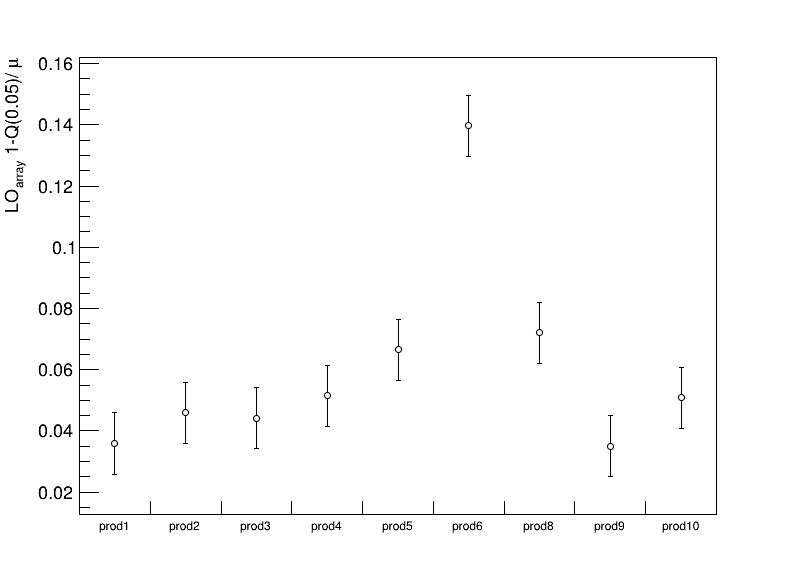

In [56]:
l2=R.TLegend(0.69,0.83,0.9,0.88)
l2.SetFillColorAlpha(0,0)
l2.SetBorderSize(0)
l2.SetTextSize(0.035)
g['ly_q5overRMS'].Draw("AP")
g['ly_q5overRMS'].GetHistogram().GetYaxis().SetTitle("LO_{array} 1-Q(0.05)/#mu")
f1=R.TF1('f1','1.62',0,10)
f1.Draw("SAME")
l2.AddEntry(f1,"gaussian PDF","L")
#l2.Draw()
#t.DrawLatexNDC(0.1,0.92,"BTL - LYSO MS3")
c1.Draw()

In [22]:
out=R.TFile('data/MS3.root','RECREATE')
for h,hh in g.items():
    print('Saving %s'%h)
    hh.SetName(h)
    hh.Write()
out.Close()

Saving ly_array
Saving sigmaT_array
Saving ly_pmt
Saving ly_esr_pmt
Saving tau_pmt
Saving ly_tofpet
Saving ly_esr_tofpet
Saving sigmaT_esr_tofpet
Saving relLossArray
Saving relLossArrayESR
Saving maxlyDTArray
Saving lyArrayVsPMT
Saving lyArrayVsPMTESR
Saving lyArrayVsTOFPETESR
Saving sigmaTArrayVsTOFPETESR
Saving relLossESRTOFPETVsPMT
Saving relLossArrayVsTOFPETESR
Saving lyDTArray
Saving sigmaTVsLYDT
Saving lyTOFPETVsPMT
Saving lyTOFPETVsPMTESR
Saving lyLossTOFPETVsPMTESR
Saving ly_array_allxtals_prod1
Saving ly_array_allxtals_prod2
Saving ly_array_allxtals_prod3
Saving ly_array_allxtals_prod4
Saving ly_array_allxtals_prod5
Saving ly_array_allxtals_prod6
Saving ly_array_allxtals_prod8
Saving ly_array_allxtals_prod9
Saving ly_array_allxtals_prod10
